tableau

https://public.tableau.com/views/Milestone1_16771641641230/Story1?:language=en-US&:display_count=n&:origin=viz_share_link

Data Kaggle

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

# Introduction

- Nama: Freddyco Rizky Apriananda
- Batch: FTDS RMT-18

1. Latar Belakang

Efisiensi adalah hal yang paling diperlukan pengusaha untuk mempertahankan ataupun mengembangkan usaha. Tanpa adanya efisiensi usaha hanya akan menghasilkan kerugian. Untuk itulah diperlukan adanya seorang data analyst untuk menganalisis data yang ada guna mengefisienkan usaha.

2. Objective

Objective untuk analisis kali ini adalah menganalisis kekurangan dan kelebihan dari hasil penjualan selama 2014-2017.

3. Problem Statement

Untuk memudahkan analisis data yang dilakukan kita dapat membagi data yang akan dianalisis menjadi beberapa bagian, yaitu "Sales, Profit & Quantity", "Sub-Category", "Segment", "State", "Date" dan "Descriptive"

Sales, Profit & Quantity
1. Dari tiga kategori barang yang ada apakah korelasi antara nilai jumlah barang yang terjual, Revenue dan Profitnya? Jelaskan.
2. Kategori barang apa yang memiliki nilai jual tertinggi? Mengapa?
3. Barang apa yang paling banyak dibeli oleh konsumen?

Sub-Category
1. Berdasarkan sub-category, barang apa yang memiliki nilai profit perjual tertinggi?
2. Dari sub category yang ada barang manakah yang memiliki profit margin tertinggi?
3. Apakah ada barang yang memiliki profit kurang dari 0?

Segment
1. Segment konsumen manakah yang memiliki jumlah profit tertinggi?
2. Apakah segment konsumen memiliki prefensi kategori barang yang lebih disukai?
3. Barang dengan kategori apa yang memiliki profit tertinggi disetiap segment?

State
1. State manakah yang memiliki profit tertinggi dan terendah?
2. Apakah ada state yang memiliki profit kurang dari 0?

Date
1. Apakah tren nilai profit meningkat atau menurun atau stagnan setiap bulannya?
2. Apakah ada bulan tertentu dimana profit lebih tinggi atau rendah dari bulan yang lain?

Statistics
1. Statistics Descriptive Analysis
2. Statistics Inferential Analysis

# Data Loading & Cleaning

## Data Loading

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Data didapatkan dari

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

In [ ]:
df = pd.read_excel(r"C:\Users\User\Downloads\Sample - Superstore.xls") # Data yang diolah

## Data Cleaning

In [106]:
pd.set_option("display.max.columns", None)

In [109]:
df.columns = df.columns.str.replace(" ","_").str.lower() # menggunakan ini agar data yang ada hanya huruf kecil dan hanya menggunakan "_" sebagai penghubung
df.columns = df.columns.str.replace("-","_").str.lower()

In [111]:
df["my"] = df['order_date'].dt.to_period('M') # Mencari month-year
df["mm"] = pd.to_datetime(df['order_date']).dt.month # Mencari hanya month

# Eksplorasi data

## Sales, Profit & Category

Total jumlah revenues secara keseluruhan

In [115]:
totalr = df.groupby("category")["sales"].sum().reset_index(name="total_revenues") # Category dan jumlah revenue

Total jumlah revenues perbulan per kategori

In [116]:
totalrm = df.groupby(["category", "my"])["sales"].sum().reset_index(name="total_revenues") # Category, (bulan-tahun) dan jumlah revenue

Total jumlah jumlah barang terjual secara keseluruhan

In [118]:
totalq = df.groupby("category")["quantity"].sum().reset_index(name="total_quantity") # Category dan jumlah barang terjual

Total jumlah barang terjual setiap bulannya

In [119]:
totalqm = df.groupby(["category", "my"])["quantity"].sum().reset_index(name="total_quantity") # Category, (bulan-tahun) dan jumlah barang terjual

Mencari jumlah profit secara keseluruhan

In [121]:
totalp = df.groupby("category")["profit"].sum().reset_index(name="total_profit") # Category dan jumlah profit

Mencari jumlah profit setiap bulannya

In [122]:
totalpm = df.groupby(["category", "my"])["profit"].sum().reset_index(name="total_profit")# Category, (bulan-tahun) dan jumlah profit

mencari apakah ada korelasi antar jumlah revenue, jumlah barang terjual dan profit

Gabungan dari total revenue, total quantity dan total profit

In [171]:
totalc = pd.DataFrame() # Gabungan totalr, totalq dan totalp
totalc["total_revenues"] = totalr["total_revenues"]
totalc["total_quantity"] = totalq["total_quantity"]
totalc["total_profit"] = totalp["total_profit"]
totalc

,total_revenues,total_quantity,total_profit
0,741999.795,8028,18451.273
1,719047.032,22906,122490.801
2,836154.033,6939,145454.948


Jumlah setiap bulannya

In [124]:
# Digunakan untuk mencari nilai korelasi
totalcm = pd.DataFrame()

In [125]:
totalcm["total_revenues"] = totalrm["total_revenues"]
totalcm["total_quantity"] = totalqm["total_quantity"]
totalcm["total_profit"] = totalpm["total_profit"]
totalcm  # Gabungan totalcm, totalpm dan totalqm untuk mencari nilai korelasi

,total_revenues,total_quantity,total_profit
0,6242.525,70,805.466
1,1839.658,23,120.692
2,14573.956,131,-1128.655
3,7944.837,81,554.380
4,6912.787,97,-349.878
...,...,...,...
139,17619.162,144,2650.858
140,26942.603,312,4595.128
141,32855.663,229,7761.421
142,49918.773,383,5674.937


Cek korelasi

In [126]:
totalcm.corr()

,total_revenues,total_quantity,total_profit
total_revenues,1.000,0.466,0.528
total_quantity,0.466,1.000,0.365
total_profit,0.528,0.365,1.000


Text(0.5, 1.0, 'Total Profit')

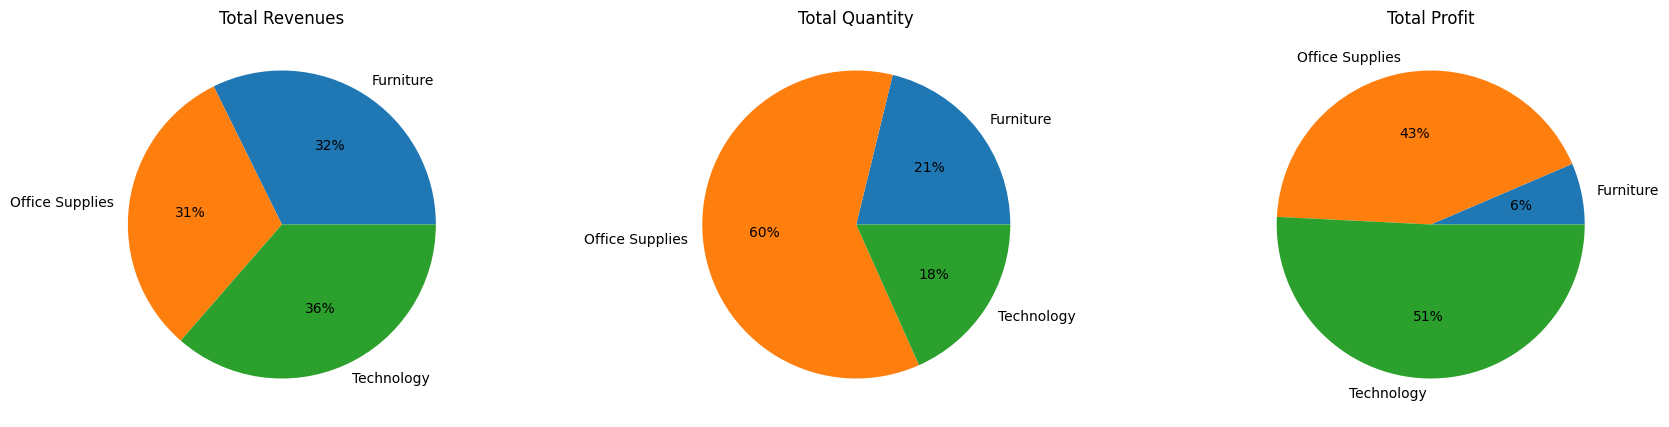

In [172]:
fig, ax = plt.subplots(ncols=3,figsize=(21,5))

ax[0].pie(totalr["total_revenues"], labels=totalr["category"], autopct='%.0f%%')
ax[0].set_title("Total Revenues")
ax[1].pie(totalq["total_quantity"], labels=totalq["category"], autopct='%.0f%%')
ax[1].set_title("Total Quantity")
ax[2].pie(totalp["total_profit"], labels=totalq["category"], autopct='%.0f%%')
ax[2].set_title("Total Profit")

Insight

1. Ketiga kategori yaitu kategori Office Supplies, Furniture dan Technology tidak memiliki korelasi yang cukup tinggi. Buktinya dapat dilihat dari kode corr() atau dari pie chart. Dari pie chart terlihat bahwa meskipun persentase jumlah revenues yang ada terbagi hampir rata, tetapi nilai quantity dan profitnya mempunyai persentase jumlah yang sangat berbeda. Dapat dilihat juga dari kategori Technology yang meskipun memiliki total quantity yang paling kecil namun kategori Technology memiliki total profit yang paling besar. Oleh karena itu korelasi antara nilai kategori Revenues, Quantity dan Profit sangatlah kecil.

2. Barang yang memiliki nilai jual tertinggi ialah barang dengan kategori Technology. Dapat dilihat pada piechart bahwa meskipun persentase quantity barang yang terjual paling kecil namun persentase profitnya yang paling besar. Oleh karena itu, jika jumlah quantity barang berkategori Technology yang terjual meningkat. Maka nilai profit yang meningkat akan lebih besar jika dibandingkan dengan kategori lain yang meningkat jumlah quantity barang terjualnya.

3. Kategori barang yang paling banyak terjual adalah kategori barang Office Supplies dengan persentase barang yang terjual sebanyak 60% dari total jumlah barang yang terjual.

## Sub-Category

Mencari profit margin dari setiap barang yang ada di sub category

In [129]:
profitm = pd.DataFrame() # Digunakan untuk mencari Profit margin

In [253]:
profitm1 = df.groupby(["category", "sub_category"])["sales"].sum().reset_index(name="total_revenue") # Digunakan untuk mencari nilai total revenue dari suatu barang
profitm2 = df.groupby(["category", "sub_category"])["profit"].sum().reset_index(name="total_profit") # Digunakan untuk mencari nilai total profit dari suatu barang
profitm3 = df.groupby(["category", "sub_category"])["quantity"].sum().reset_index(name="total_quantity") # Digunakan untuk mencari nilai total jumlah barang terjual

Buat Dataframe baru untuk memudahkan menghitung

In [131]:
# Buat Data frame profit untuk memudahkan perhitungan
profitm["category"] = profitm1["category"]
profitm["sub_category"] = profitm1["sub_category"]
profitm["total_profit"] = profitm2["total_profit"]
profitm["total_revenue"] = profitm1["total_revenue"]
profitm["profit_average"] = profitm2["total_profit"]/profitm3["total_quantity"]
profitm["profit_percentage"] = profitm2["total_profit"]/profitm1["total_revenue"]
# Gabungan profitm1, profitm2, profitm3

Profitm adalah dataframe yang dirutukan dari nilai jumlah profit percentage yang paling tinggi ke nilai profit percentage yang paling rendah

In [132]:
# Dataframe yang urutannya dari profit_percentage paling tinggi
profitm = profitm.sort_values(by="profit_percentage", ascending=False) # Urutan dari profit percentage
profitm

,category,sub_category,total_profit,total_revenue,profit_average,profit_percentage
9,Office Supplies,Labels,5546.254,12486.312,3.962,0.444
10,Office Supplies,Paper,34053.569,78479.206,6.577,0.434
7,Office Supplies,Envelopes,6964.177,16476.402,7.687,0.423
14,Technology,Copiers,55617.825,149528.030,237.683,0.372
8,Office Supplies,Fasteners,949.518,3024.280,1.039,0.314
13,Technology,Accessories,41936.636,167380.318,14.092,0.251
5,Office Supplies,Art,6527.787,27118.792,2.176,0.241
4,Office Supplies,Appliances,18138.005,107532.161,10.490,0.169
6,Office Supplies,Binders,30221.763,203412.733,5.059,0.149
2,Furniture,Furnishings,13059.144,91705.164,3.665,0.142


Membuat dataframe yang urutan isinya dari nilai rata-rata profit dari 1 barang terjual dari yang tertinggi ke yang terbesar.

In [133]:
# Dataframe yang urutannya dari jumlah rata-rata profit dari barang terjual yang paling tinggi
profitmp = profitm.sort_values(by="profit_average", ascending=False) # Urutan dari profit_average
profitmp

,category,sub_category,total_profit,total_revenue,profit_average,profit_percentage
14,Technology,Copiers,55617.825,149528.030,237.683,0.372
13,Technology,Accessories,41936.636,167380.318,14.092,0.251
16,Technology,Phones,44515.731,330007.054,13.535,0.135
1,Furniture,Chairs,26590.166,328449.103,11.286,0.081
4,Office Supplies,Appliances,18138.005,107532.161,10.490,0.169
15,Technology,Machines,3384.757,189238.631,7.693,0.018
7,Office Supplies,Envelopes,6964.177,16476.402,7.687,0.423
11,Office Supplies,Storage,21278.826,223843.608,6.738,0.095
10,Office Supplies,Paper,34053.569,78479.206,6.577,0.434
6,Office Supplies,Binders,30221.763,203412.733,5.059,0.149


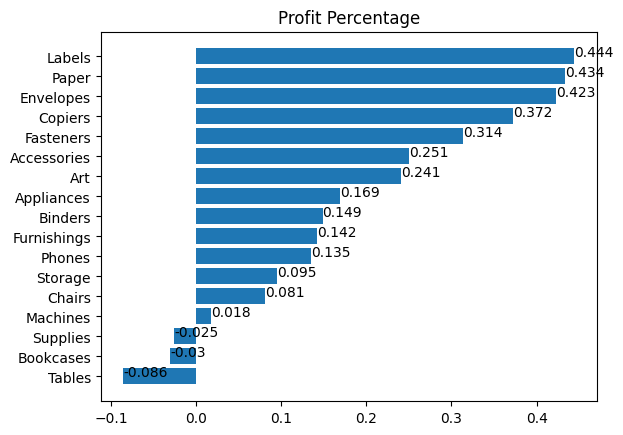

In [182]:
# Bentuk data dari profit percentage
plt.barh(profitm["sub_category"][::-1],profitm["profit_percentage"][::-1])
plt.title("Profit Percentage")

for index, value in enumerate(profitm["profit_percentage"][::-1]):
    plt.text(value, index,
             str(round(value,3)))

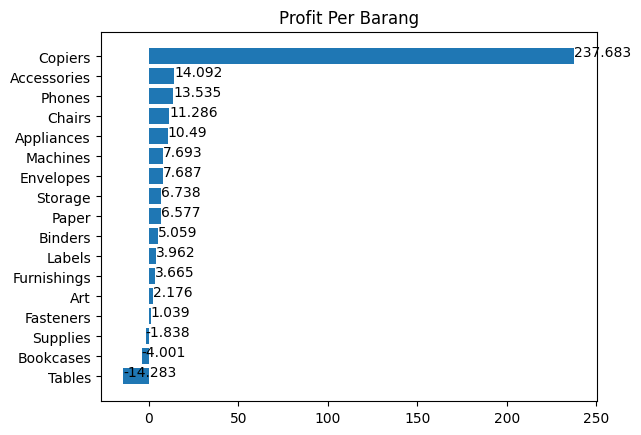

In [184]:
# Bentuk data dari profit per barang
plt.barh(profitmp["sub_category"][::-1],profitmp["profit_average"][::-1])
plt.title("Profit Per Barang")

for index, value in enumerate(profitmp["profit_average"][::-1]):
    plt.text(value, index,
             str(round(value,3)))

Text(0.5, 1.0, 'Profit Percentage')

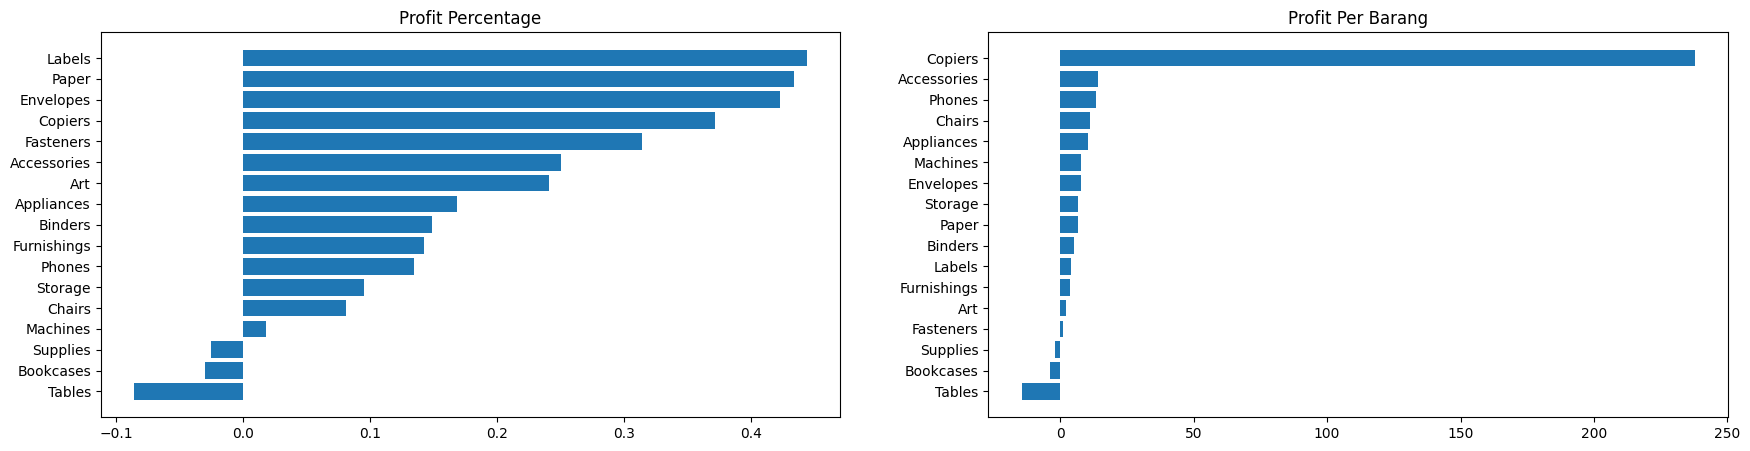

In [187]:
# Gabungan dari 2 plot
fig, ax = plt.subplots(ncols=2,figsize=(21,5))

ax[1].barh(profitmp["sub_category"][::-1],profitmp["profit_average"][::-1])
ax[1].set_title("Profit Per Barang")
ax[0].barh(profitm["sub_category"][::-1],profitm["profit_percentage"][::-1])
ax[0].set_title("Profit Percentage")

Insight

1. Berdasarkan Sub-Categorynya barang yang memiliki nilai jual paling tinggi ialah copiers, Dapat dilihat dari plot Profit Per Barang. Dari plot terlihat bahwa untuk setiap penjualan copiers profit yang didapatkan adalah 237 Dollar. Sedangkan Accessories yang menduduki peringkat ke-2 pada urutan profit per barang. Hanya memiliki rata-rata profit sebesar 14 Dollar untuk setiap penjualan. Yang berarti hanya 6% dari jumlah profit yang didapatkan dari penjualan copiers.

2. Berdasarkan Sub-Categorynya barang yang memiliki profit margin tertinggi ialah Labels dengan profit margin sebesar 44%, diikuti oleh Papers dan Envelope dengan profit margin sebesar 43% dan 42%.

3. Ada, yaitu Tables dengan kerugian sebesar 14 Dollar untuk setiap penjualannya, Bookcases dengan nilai kerugian 4 dollar dan Supplies dengan kerugian 1.8 dollar untuk setiap penjualannya.

## Segment

A. Mencari nilai berdasarkan segment

Mencari nilai revenue untuk tiap segment konsumen

In [254]:
segmentr = df.groupby("segment")["sales"].sum().reset_index(name="total_revenues") # Untuk mencari Segment dan total revenue

Mencari total jumlah profit untuk tiap segment

In [255]:
segmentp = df.groupby("segment")["profit"].sum().reset_index(name="total_profit") # Untuk mencari Segment dan total profit

Mencari Quantity

In [256]:
segmentq = df.groupby("segment")["quantity"].sum().reset_index(name="total_quantity") # Untuk mencari Segment dan total barang terjual

mencari profit margin untuk setiap segment

In [257]:
segmentpm = pd.DataFrame() # Mencari nilai profit percentage suatu barang
segmentpm["segment"] = segmentp["segment"]
segmentpm["profit_percentage"] = segmentp["total_profit"]/segmentr["total_revenues"]
segmentpm

,segment,profit_percentage
0,Consumer,0.115
1,Corporate,0.130
2,Home Office,0.140


B. Mencari Revenue tiap kategori untuk setiap segment konsumen

In [258]:
segmentrc = df.groupby(["segment", "category"])["sales"].sum().reset_index(name="total_revenues") # Mencari jumlah revenue berdasarkan segment dan category
segmentrc = segmentrc.sort_values(by=["segment", "category"])

In [259]:
segmentpc = df.groupby(["segment", "category"])["profit"].sum().reset_index(name="total_profit")  # Mencari jumlah profit berdasarkan segment dan category
segmentpc = segmentpc.sort_values(by=["segment", "category"])

In [260]:
segmentqc = df.groupby(["segment", "category"])["quantity"].sum().reset_index(name="total_quantity") # Mencari jumlah barang terjual berdasarkan segment dan category
segmentqc = segmentqc.sort_values(by=["segment", "category"])

In [261]:
# Gabungan segmentrc, segmentpc dan segmentqc
segmentpmc = df.groupby(["segment", "category"])["sales"].sum().reset_index(name="total_revenues")
segmentpmc["total_quantity"] = segmentqc["total_quantity"]
segmentpmc["total_profit"] = segmentpc["total_profit"]
segmentpmc["profit_percentage"] = segmentpmc["total_profit"]/segmentpmc["total_revenues"]
segmentpmc

,segment,category,total_revenues,total_quantity,total_profit,profit_percentage
0,Consumer,Furniture,391049.312,4166,6991.079,0.018
1,Consumer,Office Supplies,363952.136,11758,56330.321,0.155
2,Consumer,Technology,406399.897,3597,70797.810,0.174
3,Corporate,Furniture,229019.786,2495,7584.816,0.033
4,Corporate,Office Supplies,230676.462,7018,40227.320,0.174
5,Corporate,Technology,246450.119,2095,44166.998,0.179
6,Home Office,Furniture,121930.698,1367,3875.378,0.032
7,Home Office,Office Supplies,124418.434,4130,25933.160,0.208
8,Home Office,Technology,183304.017,1247,30490.140,0.166


In [262]:
# dari gabungan segmentrc, segmentpc dan segmentqc di query agar segmentnya sama
consumer = segmentpmc[segmentpmc["segment"]=="Consumer"]
corporate = segmentpmc[segmentpmc["segment"]=="Corporate"]
office = segmentpmc[segmentpmc["segment"]=="Home Office"]

Text(0.5, 1.0, 'Profit Percentage')

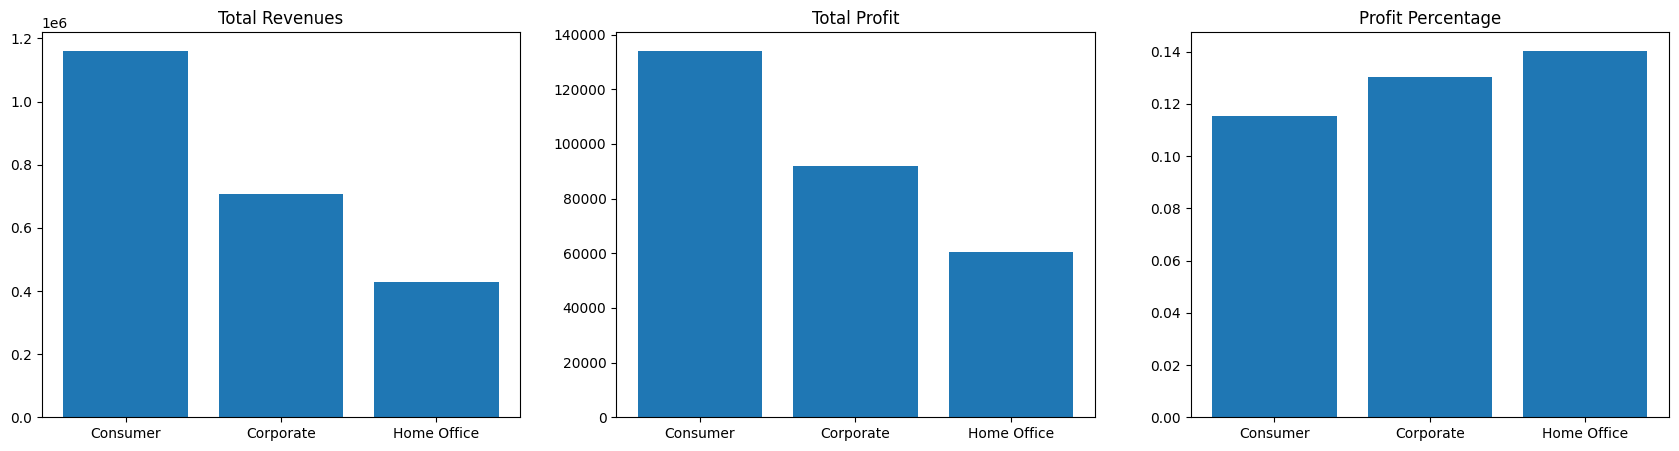

In [195]:
# Bar Total Revenues, Total profit dan Profit Percentage
fig, ax = plt.subplots(ncols=3,figsize=(21,5))

ax[0].bar(segmentr["segment"],segmentr["total_revenues"])
ax[0].set_title("Total Revenues")
ax[1].bar(segmentp["segment"],segmentp["total_profit"])
ax[1].set_title("Total Profit")
ax[2].bar(segmentpm["segment"],segmentpm["profit_percentage"])
ax[2].set_title("Profit Percentage")

Text(0.5, 1.0, 'Home Office')

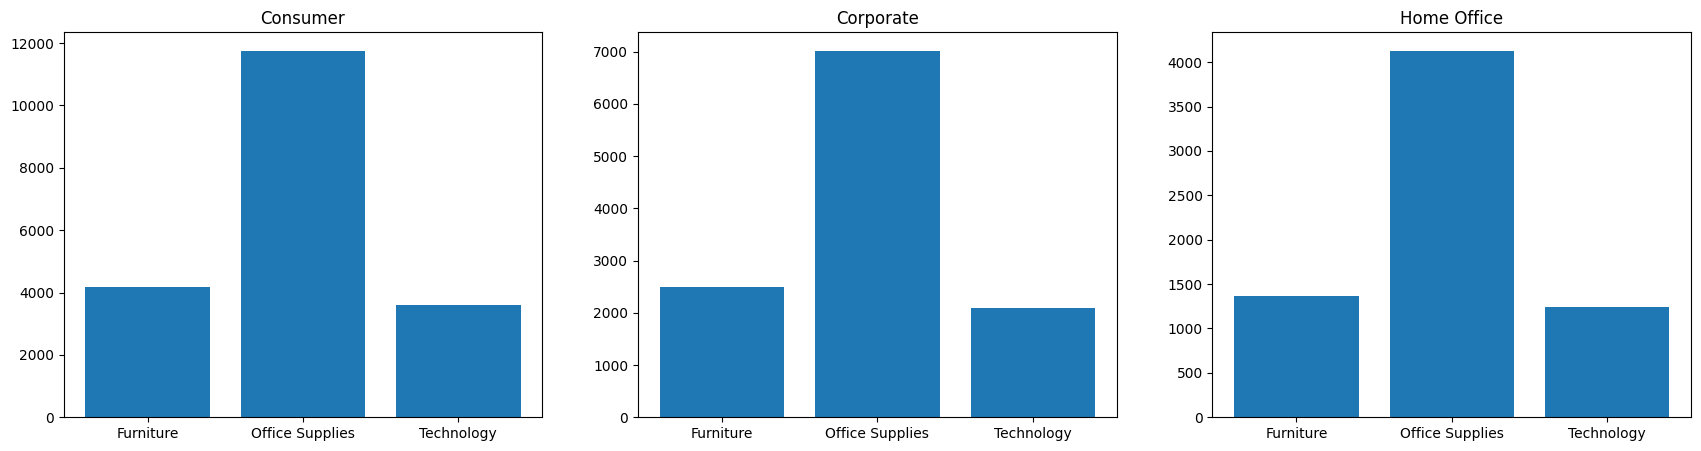

In [209]:
# Total quantity barang terjual
fig, ax = plt.subplots(ncols=3,figsize=(21,5))

ax[0].bar(consumer["category"],consumer["total_quantity"])
ax[0].set_title("Consumer")
ax[1].bar(corporate["category"],corporate["total_quantity"])
ax[1].set_title("Corporate")
ax[2].bar(office["category"],office["total_quantity"])
ax[2].set_title("Home Office")

Text(0.5, 1.0, 'Home Office')

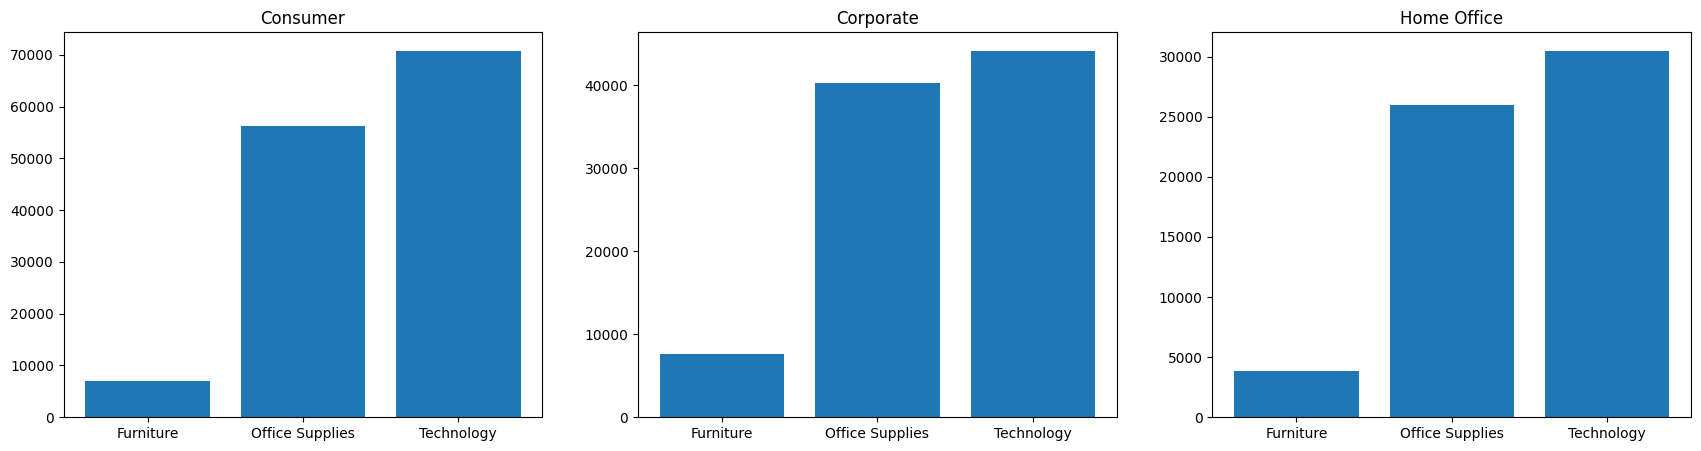

In [210]:
# Total profit berdasarkan segment
fig, ax = plt.subplots(ncols=3,figsize=(21,5))

ax[0].bar(consumer["category"],consumer["total_profit"])
ax[0].set_title("Consumer")
ax[1].bar(corporate["category"],corporate["total_profit"])
ax[1].set_title("Corporate")
ax[2].bar(office["category"],office["total_profit"])
ax[2].set_title("Home Office")

Insight

1. Segment yang memiliki total profit terbanyak adalah segment Consumer. Dengan total profit sebanyak 134119.20 dollar.

2. Segment konsumen memiliki prefensi kategori barang yang sama, yaitu barang dengan kategori Office Supplies. Dengan jumlah barang terjual sebanyak 22906 barang.

3. Dari 3 segment yang ada, semuanya memiliki kesamaan kategori barang yang memiliki jumlah profit tertinggi. Yaitu barang dengan kategori Technology dengan jumlah profit sebanyak 145455 dollar.

## State

Revenues

In [263]:
# Mencari nilai revenue diurutkan dari revenue tertinggi
stater = df.groupby("state")["sales"].sum().reset_index(name="total_revenues")
stater = stater.sort_values(by="total_revenues", ascending=False)
stater

,state,total_revenues
3,California,457687.632
30,New York,310876.271
41,Texas,170188.046
45,Washington,138641.270
36,Pennsylvania,116511.914
8,Florida,89473.708
11,Illinois,80166.101
33,Ohio,78258.136
20,Michigan,76269.614
44,Virginia,70636.720


Top 5 revenue

In [147]:
stater[0:5]

,state,total_revenues
3,California,457687.632
30,New York,310876.271
41,Texas,170188.046
45,Washington,138641.270
36,Pennsylvania,116511.914


Bot 5 revenue

In [148]:
stater[-5:]

,state,total_revenues
48,Wyoming,1603.136
39,South Dakota,1315.560
17,Maine,1270.530
46,West Virginia,1209.824
32,North Dakota,919.910


Profit

In [265]:
# Mencari nilai profit diurutkan dari profit tertinggi
statep = df.groupby("state")["profit"].sum().reset_index(name="total_profit")
statep = statep.sort_values(by="total_profit", ascending=False).reset_index()
statep

,index,state,total_profit
0,3,California,76381.387
1,30,New York,74038.549
2,45,Washington,33402.652
3,20,Michigan,24463.188
4,44,Virginia,18597.950
5,12,Indiana,18382.936
6,9,Georgia,16250.043
7,15,Kentucky,11199.697
8,21,Minnesota,10823.187
9,6,Delaware,9977.375


top 5 Profit

In [223]:
statep[:5]

,index,state,total_profit
0,3,California,76381.387
1,30,New York,74038.549
2,45,Washington,33402.652
3,20,Michigan,24463.188
4,44,Virginia,18597.950


State dengan rugi

In [268]:
statep[-10:]

,index,state,total_profit
39,35,Oregon,-1190.470
40,8,Florida,-3399.302
41,1,Arizona,-3427.925
42,40,Tennessee,-5341.694
43,4,Colorado,-6527.858
44,31,North Carolina,-7490.912
45,11,Illinois,-12607.887
46,36,Pennsylvania,-15559.960
47,33,Ohio,-16971.377
48,41,Texas,-25729.356


Visual

<BarContainer object of 49 artists>

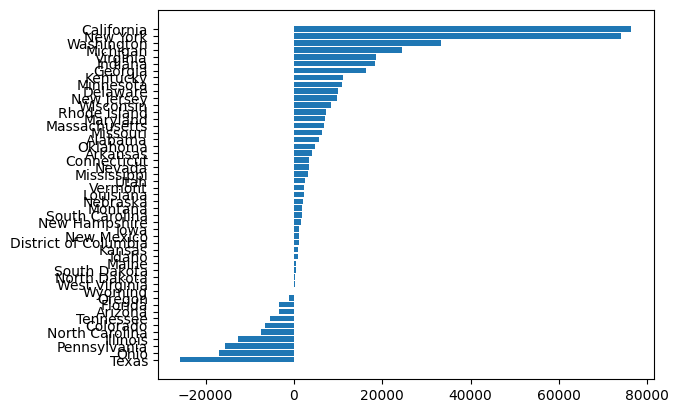

In [226]:
plt.barh(statep["state"][::-1],statep["total_profit"][::-1])

Text(0.5, 1.0, 'State Rugi')

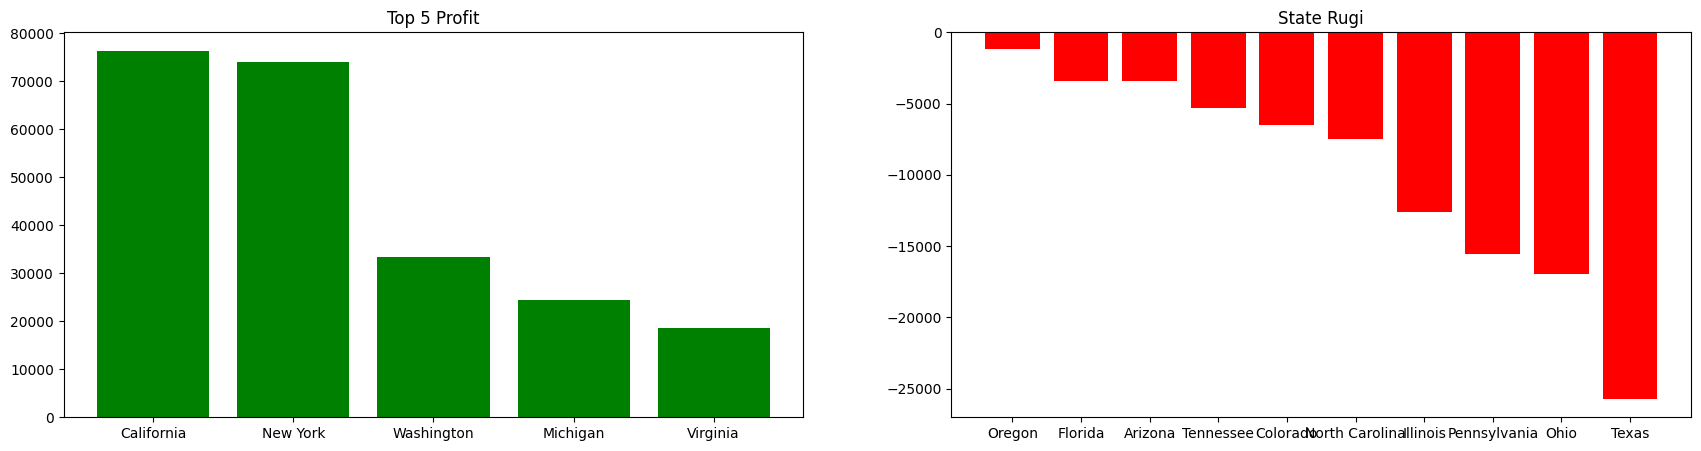

In [271]:
fig, ax = plt.subplots(ncols=2,figsize=(21,5))

ax[0].bar(statep["state"][:5],statep["total_profit"][:5], color="green")
ax[0].set_title("Top 5 Profit")
ax[1].bar(statep["state"][-10:],statep["total_profit"][-10:], color="red")
ax[1].set_title("State Rugi")

Insight

1. State dengan profit tertinggi ialah California dan state yang memiliki profit terendah adalah Texas.

2. Ada 10 State yang memiliki profit kurang dari 0, diurutkan dari kerugian yang paling besar hingga kerugian yang paling kecil yaitu 'Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina','Colorado', 'Tennessee', 'Arizona', 'Florida', 'Oregon'.

## Analysis Date

perkembangan nilai profit setiap bulannya

In [239]:
profitmy = df.groupby("my")["profit"].sum().reset_index(name="total_profit")
profitmy

,my,total_profit
0,2014-01,2450.191
1,2014-02,862.308
2,2014-03,498.730
3,2014-04,3488.835
4,2014-05,2738.710
5,2014-06,4976.524
6,2014-07,-841.483
7,2014-08,5318.105
8,2014-09,8328.099
9,2014-10,3448.257


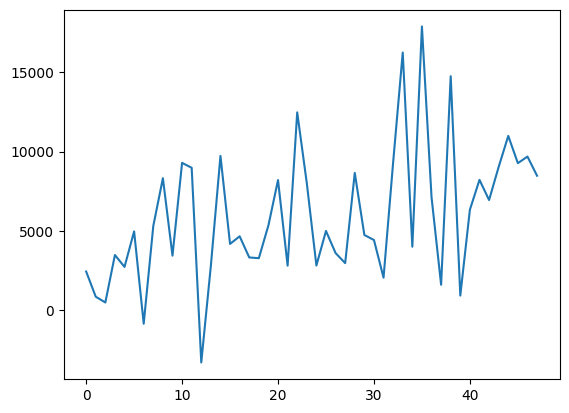

In [240]:
plt.plot(range(48), profitmy["total_profit"])

total nilai revenues setiap bulannya

In [241]:
profitmm = df.groupby("mm")["profit"].sum().reset_index(name="total_profit")
profitmm

,mm,total_profit
0,1,9134.446
1,2,10294.611
2,3,28594.687
3,4,11587.436
4,5,22411.308
5,6,21285.795
6,7,13832.665
7,8,21776.938
8,9,36857.475
9,10,31784.041


<BarContainer object of 12 artists>

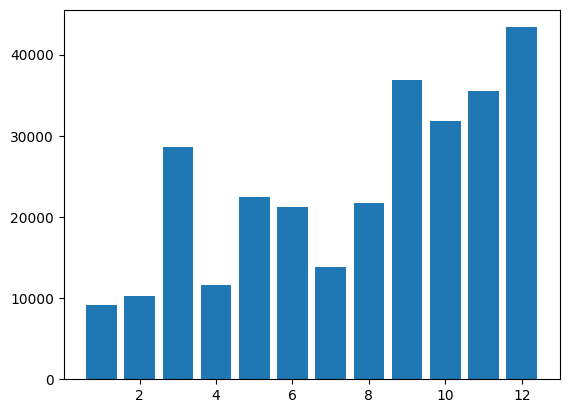

In [242]:
plt.bar(profitmm["mm"], profitmm["total_profit"])

Insight

1. Selama periode Januari 2014 hingga Desember 2017. Nilai Profit mengalami tren peningkatan. Dapat dibuktikan dengan plot yang ada.

2. Di bulan ke-12 terjadi peningkatan yang cukup tinggi dibandingkan dengan bulan lainnya. Sedangkan pada bulan 1, 2, 4 dan 7 profit yang didapatkan pada bulan itu rendah jika dibandingkan bulan yang lainnya. Khususnya pada bulan ke-1 yang mencapai titik minimum profit.

## Statistics Descriptive Analysis

Statistics Descriptive Analysis yang akan dilakukan adalah central tendency untuk nilai profit setiap bulannya

In [243]:
profitmy # Table yang digunakan profit dari bulan-tahun

,my,total_profit
0,2014-01,2450.191
1,2014-02,862.308
2,2014-03,498.730
3,2014-04,3488.835
4,2014-05,2738.710
5,2014-06,4976.524
6,2014-07,-841.483
7,2014-08,5318.105
8,2014-09,8328.099
9,2014-10,3448.257


C:\Users\User\AppData\Local\Temp\ipykernel_11160\2290928854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(profitmy['total_profit'])


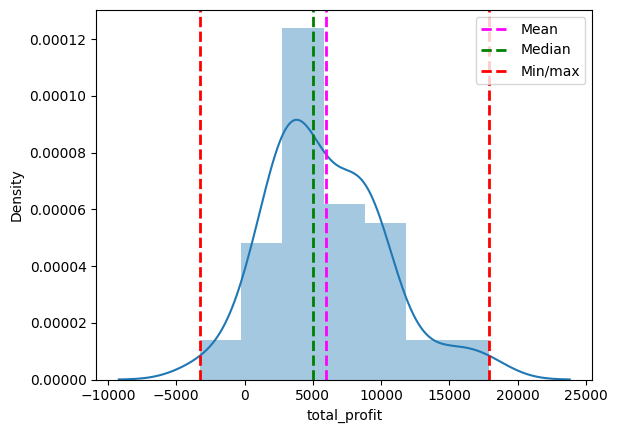

In [245]:
# Visual kan data agar mudah dibaca

sns.distplot(profitmy['total_profit'])
plt.axvline(profitmy['total_profit'].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(profitmy['total_profit'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(profitmy['total_profit'].min(), color='red', linestyle='dashed', linewidth=2, label='Min/max')
plt.axvline(profitmy['total_profit'].max(), color='red', linestyle='dashed', linewidth=2)
plt.legend()

In [248]:
print ('Min: ' + str(profitmy['total_profit'].min()))
print ('Median: ' + str(profitmy['total_profit'].median()))
print ('Mean: ' + str(profitmy['total_profit'].mean()))
print ('Max: ' + str(profitmy['total_profit'].max()))

Min: -3281.007000000001
Median: 4990.551949999999
Mean: 5966.604618749999
Max: 17885.309299999997


Insight

Dari Table dapat didapatkan bahwa Median dari nilai total profit perbulannya ialah 4990 dan untuk meannya adalah 5966. Dari table juga diketahui bahwa table miring kekanan, dapat dibuktikan dari nilai median > mean.

## Statistics Descriptive Inferential

Statistics Descriptive Inferential yang akan dilakukan adalah Two Samples Independent two tailed hypothesis testing. Dilakukan Two Samples Independent two tailed hypothesis testing karena nilai total revenue dari furniture dan office supplies dinilai cukup mirip. Oleh karena itu akan dicek apakah total revenue furniture dengan office supplies itu sama atau berbeda.

In [161]:
totalr = df.groupby("category")["sales"].sum().reset_index(name="total_revenues")
totalr

,category,total_revenues
0,Furniture,741999.795
1,Office Supplies,719047.032
2,Technology,836154.033


Diketahui bahwa jumlah revenues Furniture dan Office Supplies hampir sama yaitu 741999 dan 719047.
Hipotesis yang akan dilakukan ialah apakah revenues furniture dan office supplies Tidak mirip atau mirip.

Hipotesa yang akan dilakukan pada kasus ini:


**H0: μ_furniture = μ_office_supplies**

**H1: μ_furniture != μ_office_supplies**

In [ ]:
furniture_revenue = df[df.category == 'Furniture'].groupby('my').sum()['sales'].reset_index() # Query data furniture
office_revenue = df[df.category == 'Office Supplies'].groupby('my').sum()['sales'].reset_index() # Query data Office Supplies

In [272]:
# Cek apakah mean dari data yang ada mirip atau tidak
print("Monthly Average revenue of Furniture : ",furniture_revenue["sales"].mean())
print("Monthly Average revenue of Office Supplies : ",office_revenue["sales"].mean())

Monthly Average revenue of Furniture :  15458.32906875
Monthly Average revenue of Office Supplies :  14980.146499999997


In [164]:
# mencari t_stat dan p_val nya
t_stat, p_val = stats.ttest_ind(furniture_revenue["sales"],office_revenue["sales"])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.7912586847739036
t-statistics: 0.2654310183706294


C:\Users\User\AppData\Local\Temp\ipykernel_11160\1915113717.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(furniture_pop, label='Furnitue Sales a Month *Pop',color='blue')
C:\Users\User\AppData\Local\Temp\ipykernel_11160\1915113717.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(office_

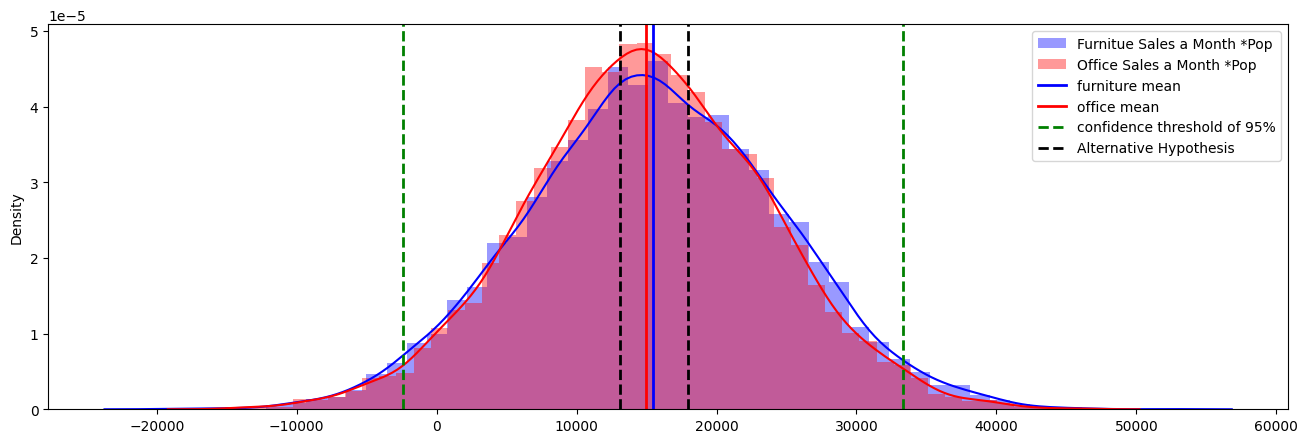

In [165]:
furniture_pop = np.random.normal(furniture_revenue.sales.mean(),furniture_revenue.sales.std(),10000)
office_pop = np.random.normal(office_revenue.sales.mean(),office_revenue.sales.std(),10000)

ci = stats.norm.interval(0.95, furniture_revenue.sales.mean(), furniture_revenue.sales.std())
plt.figure(figsize=(16,5))
sns.distplot(furniture_pop, label='Furnitue Sales a Month *Pop',color='blue')
sns.distplot(office_pop, label='Office Sales a Month *Pop',color='red')

plt.axvline(furniture_revenue.sales.mean(), color='blue', linewidth=2, label='furniture mean')
plt.axvline(office_revenue.sales.mean(), color='red',  linewidth=2, label='office mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(furniture_pop.mean()+ t_stat*furniture_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(furniture_pop.mean()- t_stat*furniture_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Insight

Didapatkan bahwa nilai p-val dari total revenue furniture dan office supplies 0.791. Karena nilai p-val lebih dari 0.05 maka kita gagal menolak hipotesis null atau berarti kita gagal menolak hipotesis total revenues furniture dan office supplies itu mirip. Yang berarti tidak ada perbedaan yang signifikan dari jumlah revenue furniture dan office supplies. Dapat dibuktikan dari kemiripan yang ada di plot.

# Overall Analysis

Dari analisa yang telah dilakukan dapat diketahui bahwa perusahaan masih bisa meningktakan tingkat keefisienan usaha. Seperti dengan cara memprioritaskan menjual barang berkategori technology, karena memiliki jumlah profit tertinggi untuk setiap barang yang terjual. Setelah memprioritaskan barang berkategori Technology kita bisa menjual barang yang sangat diminati oleh pasar yaitu barang dengan kategori Office Supplies. Pengusaha bisa mengabaikan fokus untuk menjual barang berkategori furniture karena furniture memiliki profit margin yang sangat kecil atau bahkan pengusaha dapat rugi dalam menjual barang berkategori furniture. Oleh karena itu lebih baik untuk hanya menjual 2 kategori barang yaitu Technology dan Office Supplies.

Dalam kategori barang technology ada barang yang harus di prioritaskan untuk dijual yaitu Copiers, karena profit untuk setiap penjualan Copiers adalah 237 dollar atau hampir 17 kali lipat dari profit barang tertinggi no 2. Untuk barang yang harus ditinggalkan dijual adalah Tables, Bookcase dan Supplies karena pengusaha akan mengalami kerugian saat menjual kedua barang tersebut.

Untuk segment konsumen kita masih dapat meningkatkan setiap segment. Karena semua segment konsumen masih memilki tren yang positif.

Untuk state yang harus dibenahi ada 10 state yaitu 'Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina','Colorado', 'Tennessee', 'Arizona', 'Florida', 'Oregon'. 10 State tersebut harus dibenahi karena 10 state tersebut tidaklah menghasilkan keuntungan, namun hanya menghasilkan kerugian.

Secara keseluruhan perusahaan masih berada pada jalur yang benar. Karena tren Jumlah revenues, profit dan quantity masih meningkat.